# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 30.96, 即時現金賣出: 31.63


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "html5lib")
#print(html)
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print(rate_table)

for i in range(len(rate_table)):
    print('-----------------------------------------------------------------------')
    print(rate_table[i].find('div', class_='visible-phone print_hide').text.lstrip())

    buybycash = rate_table[i].find('td', attrs={'data-table':'本行現金買入'}).text
    sellbycash = rate_table[i].find('td', attrs={'data-table':'本行現金賣出'}).text
    buynow = rate_table[i].find('td', attrs={'data-table':'本行即期買入'}).text
    sellnow = rate_table[i].find('td', attrs={'data-table':'本行即期賣出'}).text
    print('本行現金買入： %s, 本行現金賣出： %s'%(buybycash, sellbycash))
    print('本行即期買入： %s, 本行即期賣出： %s'%(buynow, sellnow))
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
美金 (USD)
                            
本行現金買入： 29.715, 本行現金賣出： 30.385
本行即期買入： 30.065, 本行即期賣出： 30.165
-----------------------------------------------------------------------
港幣 (HKD)
                            
本行現金買入： 3.71, 本行現金賣出： 3.914
本行即期買入： 3.836, 本行即期賣出： 3.896
-----------------------------------------------------------------------
英鎊 (GBP)
                            
本行現金買入： 37.84, 本行現金賣出： 39.96
本行即期買入： 38.84, 本行即期賣出： 39.26
-----------------------------------------------------------------------
澳幣 (AUD)
                            
本行現金買入： 20.45, 本行現金賣出： 21.23
本行即期買入： 20.72, 本行即期賣出： 20.95
-----------------------------------------------------------------------
加拿大幣 (CAD)
                            
本行現金買入： 22.38, 本行現金賣出： 23.29
本行即期買入： 22.77, 本行即期賣出： 22.99
-----------------------------------------------------------------------
新加坡幣 (SGD)
                            
本行現金買入： 21.65, 本行現金賣出： 22.56
本行即期買入： 22.14,

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)

['2019/08/30', '2019/08/29', '2019/08/28', '2019/08/27', '2019/08/26', '2019/08/23', '2019/08/22', '2019/08/21', '2019/08/20', '2019/08/19', '2019/08/16', '2019/08/15', '2019/08/14', '2019/08/13', '2019/08/12', '2019/08/09', '2019/08/08', '2019/08/07', '2019/08/06', '2019/08/05', '2019/08/02', '2019/08/01']


<Figure size 720x576 with 0 Axes>

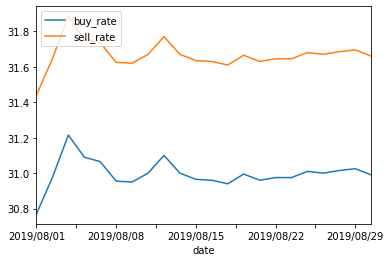

In [5]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].text))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率
print(date_history)
# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金 (USD)


<Figure size 720x576 with 0 Axes>

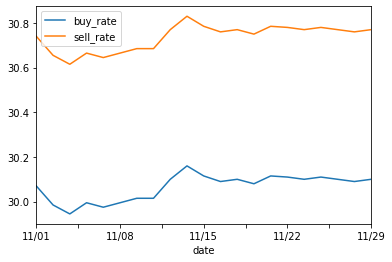

港幣 (HKD)


<Figure size 720x576 with 0 Axes>

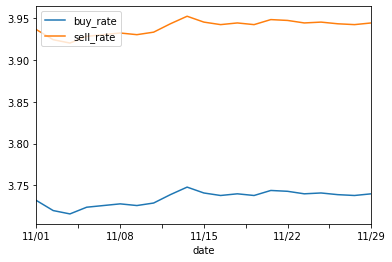

英鎊 (GBP)


<Figure size 720x576 with 0 Axes>

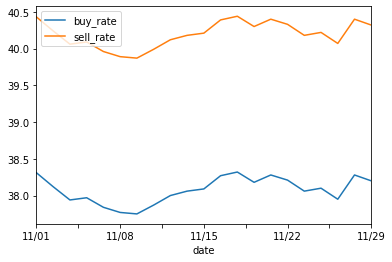

澳幣 (AUD)


<Figure size 720x576 with 0 Axes>

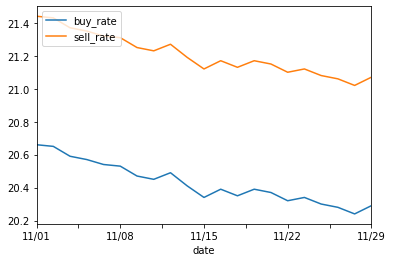

加拿大幣 (CAD)


<Figure size 720x576 with 0 Axes>

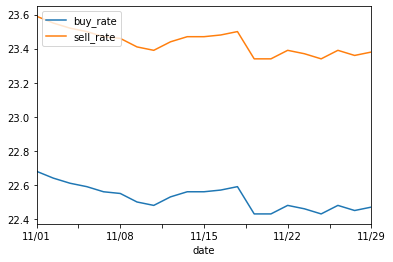

新加坡幣 (SGD)


<Figure size 720x576 with 0 Axes>

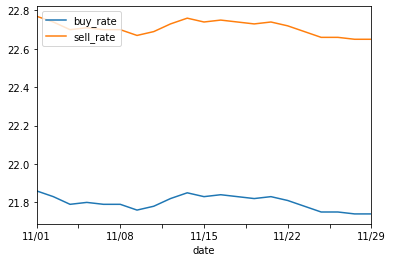

瑞士法郎 (CHF)


<Figure size 720x576 with 0 Axes>

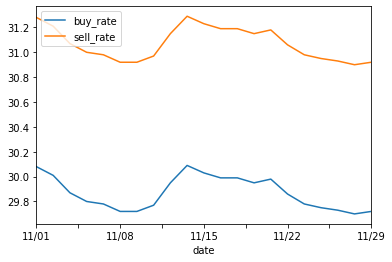

日圓 (JPY)


<Figure size 720x576 with 0 Axes>

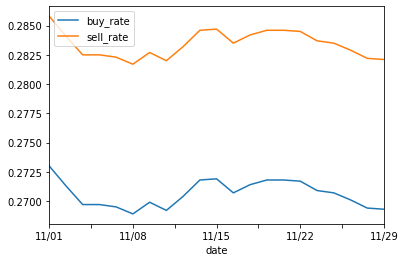

南非幣 (ZAR)


<Figure size 720x576 with 0 Axes>

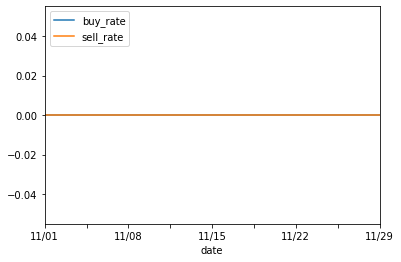

瑞典幣 (SEK)


<Figure size 720x576 with 0 Axes>

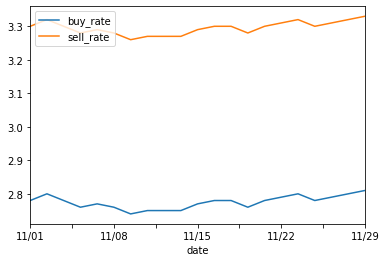

紐元 (NZD)


<Figure size 720x576 with 0 Axes>

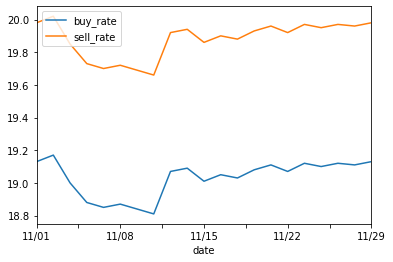

泰幣 (THB)


<Figure size 720x576 with 0 Axes>

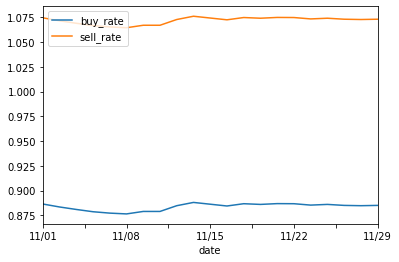

菲國比索 (PHP)


<Figure size 720x576 with 0 Axes>

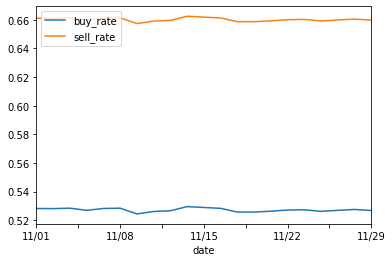

印尼幣 (IDR)


<Figure size 720x576 with 0 Axes>

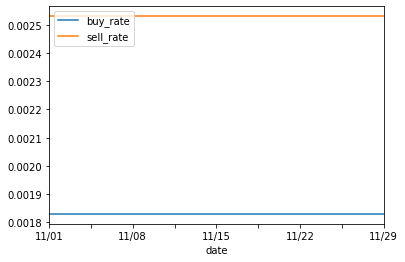

歐元 (EUR)


<Figure size 720x576 with 0 Axes>

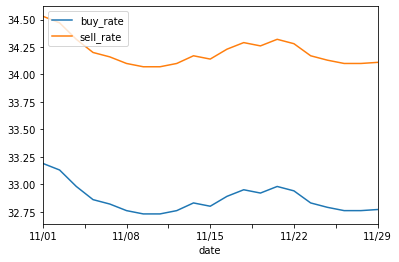

韓元 (KRW)


<Figure size 720x576 with 0 Axes>

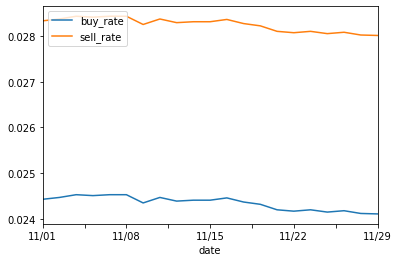

越南盾 (VND)


<Figure size 720x576 with 0 Axes>

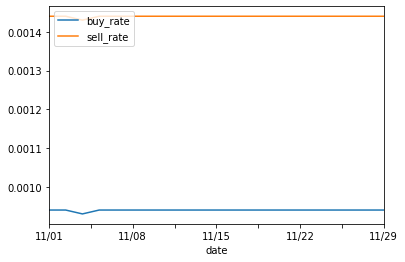

馬來幣 (MYR)


<Figure size 720x576 with 0 Axes>

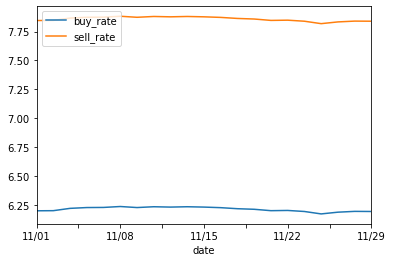

人民幣 (CNY)


<Figure size 720x576 with 0 Axes>

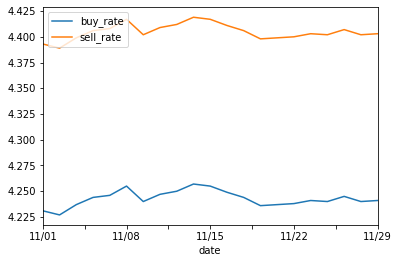

In [6]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "html5lib")
rate_table = html.find('tbody').find_all('tr')

historical_url = []
for i in range(len(rate_table)):
    historical_url.append(rate_table[i].find('td', attrs = {'data-table' : "歷史匯率"}).find('a')['href'])
    
#先試試看美金11月資料
#print(historical_url)
#usd_link = 'https://rate.bot.com.tw/' + historical_url[0]
#usd_url = usd_link.replace('history', 'quote/2019-11')
#resp = requests.get(usd_url)
#soup = BeautifulSoup(resp.text, 'html5lib')

for h in historical_url:
    link = 'https://rate.bot.com.tw/' + h
    url = link.replace('history', 'quote/2019-11')
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, 'html5lib')
    hisrate_table = soup.find('tbody').find_all('tr')
    
    date = []
    buybycash = []
    sellbycash = []
    
    for i in hisrate_table:
        date.append(datetime.strptime(i.find('a').text.replace('2019/',''), '%m/%d').strftime('%m/%d'))
        buybycash.append(float(i.find_all('td', class_="rate-content-cash text-right print_table-cell")[0].text))
        sellbycash.append(float(i.find_all('td', class_="rate-content-cash text-right print_table-cell")[1].text))
        #float()把字串或整數變回浮點數

    HistoryExRate_cash = pd.DataFrame({'date':date, 'buy_rate':buybycash, 'sell_rate':sellbycash})
    HistoryExRate_cash = HistoryExRate_cash.set_index('date') #index代表橫軸
    HistoryExRate_cash = HistoryExRate_cash.sort_index(ascending=True)
    
    print(soup.find('td', class_="text-center tablet_hide").get_text())
    plt.figure(figsize=(10, 8))
    HistoryExRate_cash[['buy_rate', 'sell_rate']].plot()
    plt.legend(loc='upper left', labels = ['buy_rate', 'sell_rate'])
    plt.show()

